In [10]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
from IPython.display import Markdown, display
%matplotlib inline

def printmd(string):
    display(Markdown(string))
    
def displaynum(img):
    img = img.values.reshape(28,28)
    plt.imshow(img, cmap ='gray')
    

In [2]:
#Reading the data
images_data = pd.read_csv('train.csv')
images_data.shape

(42000, 785)

In [3]:
images_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image = images_data.iloc[:5000,1:]
label = images_data.iloc[:5000,:1]
train_image, test_image, train_label, test_label =  train_test_split(image,label, train_size = 0.8, test_size = 0.2)

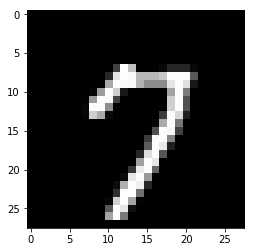

In [5]:
# Display a number
displaynum(train_image.iloc[2])

In [8]:
# Training the basic SVM
clf = svm.SVC()
clf.fit(train_image, train_label.values.ravel())
score = clf.score(test_image,test_label)
printmd(f'The basic SVM classifier : **{score*100}%** accuracy.')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This

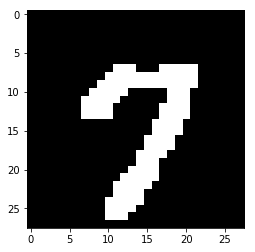

In [21]:
# Converting the images from gray scale to black and white.
test_image[test_image>0]=1
train_image[train_image>0]=1
displaynum(train_image.iloc[2])

In [22]:
# Training the basic SVM on black and white images
clf = svm.SVC()
clf.fit(train_image, train_label.values.ravel())
score = clf.score(test_image,test_label)
printmd(f'The B/W SVM classifier : **{score*100}%** accuracy.')

The B/W SVM classifier : **91.4%** accuracy.

In [37]:
test_data =pd.read_csv('test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data)



In [41]:
df = pd.DataFrame(results)
df.columns=['Label']
df['ImageId'] = df.index + 1
df =  df[['ImageId','Label']]
df.to_csv('results.csv', header=True, index = False)

In [40]:
#df.head()
df.shape

(28000, 2)

In [32]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
